<a href="https://colab.research.google.com/github/Wikanes-k/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. วันธรรมดาหรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [35]:
set(flights['วันในสัปดาห์'])

{1, 2, 3, 4, 5, 6, 7}

In [5]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [6]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [34]:
gen_exams('623021055-6')

รหัสนักศึกษา 623021055-6 ทำข้อ 0 และ 5


In [16]:
merged_data = flights.merge(airports,how='left',left_on='รหัสสนามบินต้นทาง',right_on='รหัสสนามบิน') #รวมตาราง 2 ตาราง flights และ airports 

In [17]:
merged_data #แสดงตารางที่เชื่อมแล้ว

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


In [18]:
merged_data.dropna() #ตรวจสอบ missing

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International
...,...,...,...,...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3,13204,Orlando,FL,Orlando International
2702214,19,6,DL,10397,13495,-2,-3,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International
2702215,19,6,DL,10140,10397,18,9,10140,Albuquerque,NM,Albuquerque International Sunport
2702216,19,6,DL,10397,13244,10,7,10397,Atlanta,GA,Hartsfield-Jackson Atlanta International


#0.หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด

In [46]:
merged_data.groupby('รัฐ').count() #ดูรัฐต่างๆ

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,ชื่อสนามบิน
รัฐ,,,,,,,,,,
AK,7700,7700,7700,7700,7700,7700,7700,7700,7700,7700
AZ,100710,100710,100710,100710,100710,100710,100710,100710,100710,100710
CA,380046,380046,380046,380046,380046,380046,380046,380046,380046,380046
CO,97259,97259,97259,97259,97259,97259,97259,97259,97259,97259
CT,13042,13042,13042,13042,13042,13042,13042,13042,13042,13042
DC,80536,80536,80536,80536,80536,80536,80536,80536,80536,80536
FL,208139,208139,208139,208139,208139,208139,208139,208139,208139,208139
GA,148563,148563,148563,148563,148563,148563,148563,148563,148563,148563
HI,28395,28395,28395,28395,28395,28395,28395,28395,28395,28395


###เนื่องจากโจทย์ถามเครื่องบินขาเข้า แสดงว่าต้องดูรหัสสนามบินปลายทาง

In [47]:
max = merged_data.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False)  #รัฐที่มีเครื่องบินขาเข้ามากที่สุด
max.iloc[:1,4:5]

,รหัสสนามบินปลายทาง
รัฐ,
CA,380046


In [48]:
min = merged_data.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=True) #รัฐที่มีเครื่องบินขาเข้าน้อยที่สุด
min.iloc[:1:,4:5]

,รหัสสนามบินปลายทาง
รัฐ,
AK,7700


#5.วันธรรมดาหรือวันเสาร์-อาทิตย์มีเครื่องบินขาเข้ามากกว่ากัน (วันจันทร์ = 1, วันอังคาร = 2, ...)

In [54]:
week = merged_data.groupby('วันในสัปดาห์').count().sort_values(by=['รหัสสนามบินปลายทาง'],ascending=False) #ดูจำนวนเครื่องบินขาเข้าวันในสัปดาห์
week.iloc[:,3:4]

,รหัสสนามบินปลายทาง
วันในสัปดาห์,
1,407837
4,406563
3,403072
2,397594
5,396387
7,372228
6,318537


In [58]:
Weekday = week.iloc[:5,3:4].sum() #หาจำนวนเครื่องบินขาเข้าในวันธรรมดา
Weekday

รหัสสนามบินปลายทาง    2011453
dtype: int64

In [56]:
Weekend = week.iloc[5:7,3:4].sum() #หาจำนวนเครื่องบินขาเข้าในวันเสาร์-อาทิตย์
Weekend

รหัสสนามบินปลายทาง    690765
dtype: int64

###สรุปว่า วันธรรมดามีเครื่องบินขาเข้ามากกว่าวันเสาร์-อาทิตย์

#คิดโจทย์วาด Histogram แสดงสายการบินจากน้อยไปมาก

In [49]:
merged_data.groupby('สายการบิน').count() #ดูสายการบิน

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
9E,80031,80031,80031,80031,80031,80031,80031,80031,80031,80031
AA,289855,289855,289855,289855,289855,289855,289855,289855,289855,289855
AS,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906
DL,381657,381657,381657,381657,381657,381657,381657,381657,381657,381657
EV,157928,157928,157928,157928,157928,157928,157928,157928,157928,157928
F9,35738,35738,35738,35738,35738,35738,35738,35738,35738,35738
FL,92702,92702,92702,92702,92702,92702,92702,92702,92702,92702
HA,17432,17432,17432,17432,17432,17432,17432,17432,17432,17432


In [63]:
summary = merged_data.groupby('สายการบิน').count().sort_values(by=['วันในเดือน'],ascending=True) #เรียงข้อมูลจากน้อยไปมาก
summary

,วันในเดือน,วันในสัปดาห์,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
สายการบิน,,,,,,,,,,
HA,17432,17432,17432,17432,17432,17432,17432,17432,17432,17432
VX,34739,34739,34739,34739,34739,34739,34739,34739,34739,34739
F9,35738,35738,35738,35738,35738,35738,35738,35738,35738,35738
YV,52821,52821,52821,52821,52821,52821,52821,52821,52821,52821
AS,68555,68555,68555,68555,68555,68555,68555,68555,68555,68555
9E,80031,80031,80031,80031,80031,80031,80031,80031,80031,80031
FL,92702,92702,92702,92702,92702,92702,92702,92702,92702,92702
MQ,113212,113212,113212,113212,113212,113212,113212,113212,113212,113212
B6,121906,121906,121906,121906,121906,121906,121906,121906,121906,121906


In [68]:
import numpy as np #อิมพอต
from matplotlib import pyplot as plt

<BarContainer object of 16 artists>

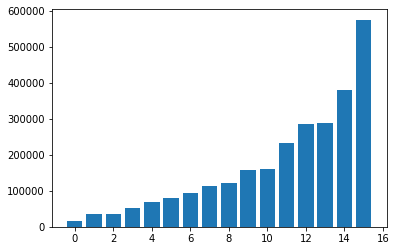

In [71]:
plt.bar(np.arange(len(summary.iloc[:,1])), summary.iloc[:,1]) #แสดงกราฟ